# Anomaly Detection

Team: **Jeremy Lagunas**, **Meredith Wang**, **Luis Arce**

August 2022

<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-adcbe3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-4b86b4.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>

<h1 align="center">------------ 🏘️ Project Goal ------------</h1>

**Codeup** staff bring up some questions to the data science team in email, and our goal is to answer the quesions regaring the security of codeup curriculum through anomaly detection and data analysis.

<h1 align="center">------------ 📝 Questions Raised ------------</h1>

▪️ Which lesson appears to attract the most traffic consistently across cohorts (per program), which lessons are least accessed? (Luis)

▪️Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over? (Jeremy)

▪️ Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? (Luis)

▪️ Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? (Meredith)

▪️ At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? (Jeremy)

▪️ What topics are grads continuing to reference after graduation and into their jobs (for each program)? (Merdith)

▪️ Which lessons are least accessed? (Luis)

<h1 align="center">------------ 📚 Data Dictionary ------------</h1>

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">*date*</span> | datetime | The date of log entry
<span style="background-color: #ffe0bd">*time*</span> | datetime | The time of the day of log entry
<span style="background-color: #ffe0bd">*path*</span> | string | The path the user is on
<span style="background-color: #ffe0bd">*user id*</span> | float | The primary key of log table, indicating each user
<span style="background-color: #ffe0bd">*ip*</span> | string | The user's ip address
<span style="background-color: #ffe0bd">*cohort name*</span> | string | The name of user's cohort
<span style="background-color: #ffe0bd">*slack*</span> | string | The name of the slack chanel that user belongs to
<span style="background-color: #ffe0bd">*start date*</span>| datetime | The start date of the cohort
<span style="background-color: #ffe0bd">*end date*</span> | datetime | The end date of the cohort
<span style="background-color: #ffe0bd">*program id*</span> | datetime | This indicates which program is the user in

<h1 align="center">------------ 🧮 Wrangle Data ------------</h1>

## 1. Data Acquisition
▪️ Stored the sensitive data in an **env.py** file in order to get conncetion to the mySQL server and abtain our data.

▪️ To acquire the curriculum data for Codeup, we used the **curriculum_log** database in the mySQL server, and joined the following tables to gather data: <samp>`cohort, logs`</samp>

▪️ Created **acquire.py** and user-defined function `get_data()` to acquire and cache data.

In [1]:
# Import essential libraries
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

# Import functions
import acquire
import prepare
import explore

# set columnns display format
pd.set_option('display.max_columns', None)

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
messy_df = acquire.get_data()

# Check the shape of our messy dataframe
messy_df.shape

(847330, 11)

## 2. Data Preparation - Data Cleaning 🧹 
▪️ **Missing Values (NaN):**
    
- All the null values are <span style="color: blue"> **dropped** </span>

- We feel comfortable dropping null values because there's only 1 row of missing value

▪️ **Data Conversion**
- Convert `date` to datatime object

- Set date as index of the dataframe

▪️ **Data Encoding**
- Created new column `program` corresponding to `program_id`

In [2]:
# Cleaning the data using function from prepare.py
df = prepare.prep_data(messy_df)

# Checking the shape of our cleaned dataframe
df.shape

(847329, 12)

<h1 align="center">------------ 📊 Data Context ------------</h1>

<h1 align="center">------------ 👩🏻‍💻 Exploratory Analysis ------------</h1>

1. **Which lesson appears to attract the most traffic consistently across cohorts (per program), which lessons are least accessed?**(Luis)

2. **Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?** (Jeremy)

3. **Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?** (Luis)

4. **Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?**(Meredith)

5. **At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?**(Jeremy)

6. **What topics are grads continuing to reference after graduation and into their jobs (for each program)?**(Merdith)

## Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program), which lessons are least accessed?

### Approach
1. Create and separate the datasets of Web Development and Data Science programs.
2. Remove the popular logistic pages in the curriculum. I.E. '/' = main page, 'toc' = Table of Contents, et.c
3. Use .value_counts() on path to see the most accessed pages.
4. Store the top 10 page names with page counts as a variable.

### Top 10 accessed pages across programs

▪️ **Full Stack PHP (Web Development) Program**

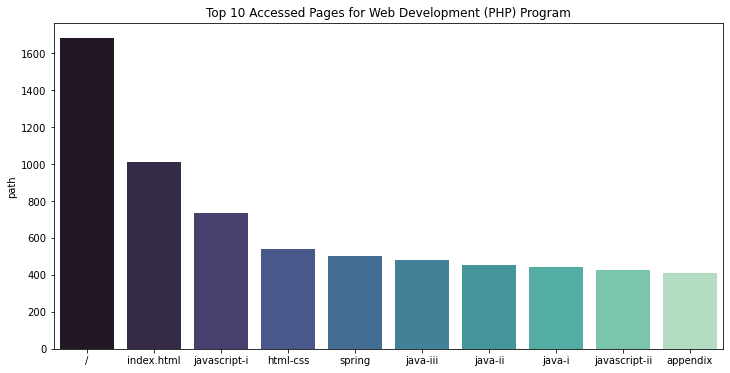

In [3]:
# Calling function to plot the top 10 pages for web dep php program
explore.q1_p1(df)

▪️ **Full Stack Java (Web Development) Program**

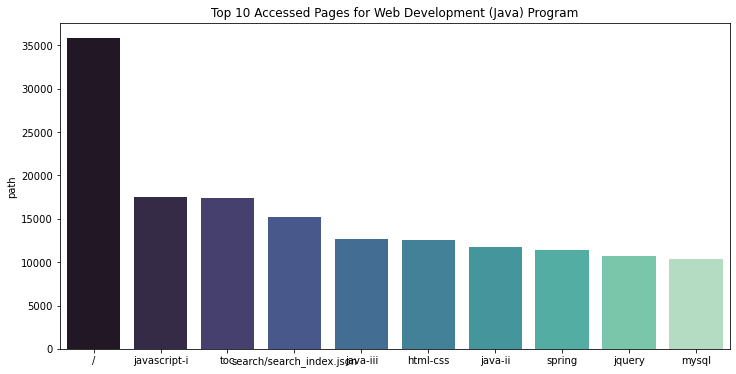

In [4]:
# Calling function to plot the top 10 pages for web dep java program
explore.q1_p2(df)

▪️ **Data Science Program**

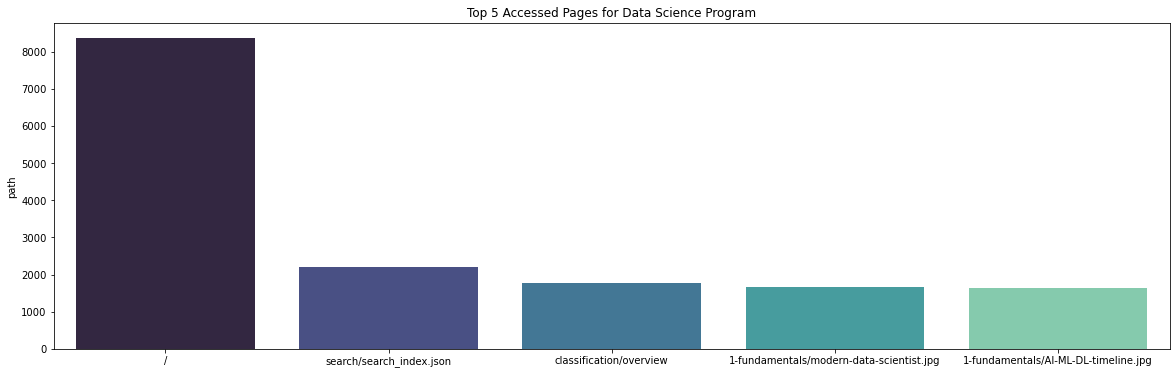

In [5]:
# Calling function to plot the top 5 pages for data science program
explore.q1_p3(df)

▪️ **Front End Program**

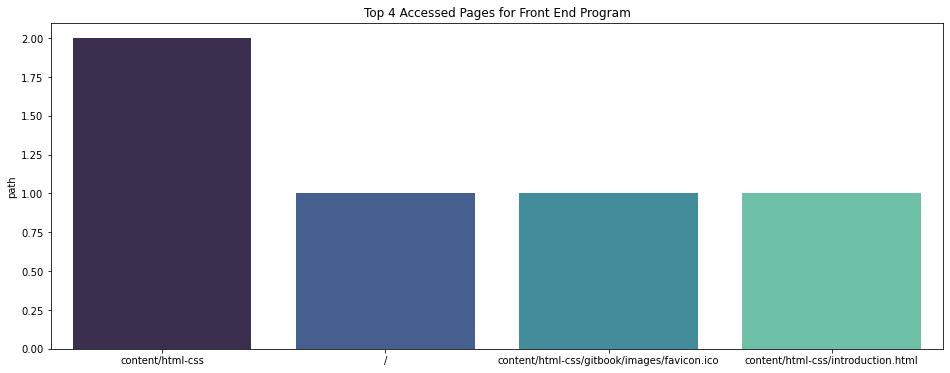

In [6]:
# Calling function to plot the top 4 pages for front end program
explore.q1_p4(df)

### Web Development Program

In [8]:
# Remove staff from the analysis.
df.loc[~(df.cohort_name == 'Staff')]

# Step 1.
# Web Devlopment Cohorts
wd_cohorts = df.loc[df.program_id.isin([1, 2, 4])]

# Data Science Cohorts
ds_cohorts = df.loc[df.program_id == 3]

In [9]:
# Step 2.
# Create a variable to store pages to filter out.
remove_pages = [ 'index.html', 'search/search_index.json', 'mkdocs/search_index.json','/', 'toc', 'appendix',]

# Clean page_viewed to remove logistic pages: Searches, Table of Contents, Appendix
wd_cohorts = wd_cohorts.loc[~wd_cohorts.path.isin(remove_pages)]

# Replace content main page with empty string.
wd_cohorts.page_viewed = wd_cohorts.path.replace('content/', '', regex=True)

In [10]:
# Step 3 `.value_counts()`
wd_top_10_pages = wd_cohorts.path.value_counts().nlargest(10)
print(wd_top_10_pages)
wd_top_10_pages = wd_top_10_pages.index.to_list()

javascript-i                                                                 18193
java-iii                                                                     13162
html-css                                                                     13111
java-ii                                                                      12173
spring                                                                       11877
jquery                                                                       11037
mysql                                                                        10602
java-i                                                                       10460
javascript-ii                                                                10290
javascript-i/introduction/working-with-data-types-operators-and-variables     7326
Name: path, dtype: int64


### Data Science

In [11]:
# Step 1.
# Create a variable to store pages to filter out.
remove_pages = ['/', 'toc', 'appendix', 'index.html', 'search/search_index.json', 'mkdocs/search_index.json']

# Clean page_viewed to remove logistic pages: Searches, Table of Contents, Appendix
ds_cohorts = ds_cohorts.loc[~ds_cohorts.path.isin(remove_pages)]

# Replace content main page with empty string.
ds_cohorts.path = ds_cohorts.path.replace('content/', '', regex=True)

In [12]:
# Step 2 `.value_counts()`
ds_top_10_pages = ds_cohorts.path.value_counts().nlargest(10)
print(ds_top_10_pages)
ds_top_10_pages = ds_top_10_pages.index.to_list()

classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
Name: path, dtype: int64


## Takeaways for Question 1:

▪️ Data Science cohorts access <b>classification/overview</b>  the most.

▪️ Web Development cohorts access <b>javascript-i</b> the most.

***

## Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [14]:
# create a variable which contains data only for program 1
program_1 = df[df['program_id'] == 1.0]
# Which cohorts are in program 1?
program_1.cohort_id.value_counts()

14.0    9587
1.0     8890
17.0    4954
13.0    2845
8.0     1712
19.0    1237
7.0      598
12.0     302
11.0     253
2.0       93
6.0       72
4.0        4
5.0        1
Name: cohort_id, dtype: int64

In [15]:
def match_finder(x, y):
    '''
    This function takes in two lists and compares them. 
    If one of the items in the first list is in the second list, it will print it.
    If there are no matches it will print 'no match'
    '''
    for i in x:
        if i in y:
            print(i)
    else:
        print('no match')

In [16]:
# Creates the most and least viewed paths for each cohort in program 1. 

# cohort 14
cohort_14_most = list(program_1[program_1['cohort_id'] == 14.0].path.value_counts().index[0:10])
cohort_14_least = list(program_1[program_1['cohort_id'] == 14.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 1
cohort_1_most = list(program_1[program_1['cohort_id'] == 1.0].path.value_counts().index[0:10])
cohort_1_least = list(program_1[program_1['cohort_id'] == 1.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 17
cohort_17_most = list(program_1[program_1['cohort_id'] == 17.0].path.value_counts().index[0:10])
cohort_17_least = list(program_1[program_1['cohort_id'] == 17.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 13
cohort_13_most = list(program_1[program_1['cohort_id'] == 13.0].path.value_counts().index[0:10])
cohort_13_least = list(program_1[program_1['cohort_id'] == 13.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 8
cohort_8_most = list(program_1[program_1['cohort_id'] == 18.0].path.value_counts().index[0:10])
cohort_8_least = list(program_1[program_1['cohort_id'] == 18.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 19
cohort_19_most = list(program_1[program_1['cohort_id'] == 19.0].path.value_counts().index[0:10])
cohort_19_least = list(program_1[program_1['cohort_id'] == 19.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 7
cohort_7_most = list(program_1[program_1['cohort_id'] == 7.0].path.value_counts().index[0:10])
cohort_7_least = list(program_1[program_1['cohort_id'] == 7.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 12
cohort_12_most = list(program_1[program_1['cohort_id'] == 12.0].path.value_counts().index[0:10])
cohort_12_least = list(program_1[program_1['cohort_id'] == 12.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 11
cohort_11_most = list(program_1[program_1['cohort_id'] == 11.0].path.value_counts().index[0:10])
cohort_11_least = list(program_1[program_1['cohort_id'] == 11.0].path.value_counts().loc[lambda x: x <=5].index)

COHORT 14 comparison

## Question 3

***

## Question 4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### 1️⃣  Any users have significant amount of IP address?

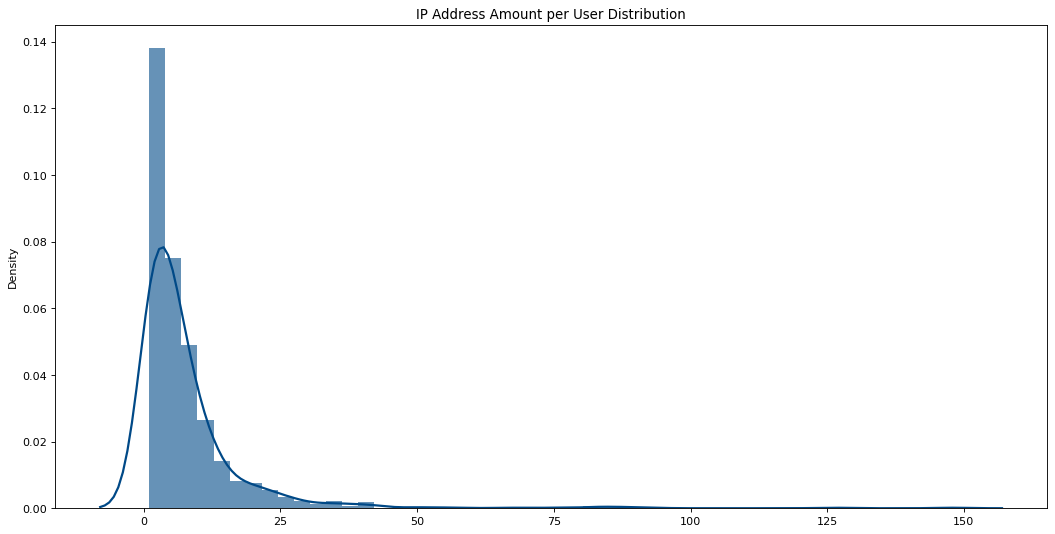

In [3]:
# overall distribution of ip address amount of users
explore.q3_distribution(df)

#### Using IQR to determind the upper bound for the amount of IP address belongs to each user

In [4]:
# Callinng function to print out the upper bound
explore.q3_upperbound(df)

The upper bound of IP address amount is:  30.0


#### Abstracting out users with abnormal amount of IP address

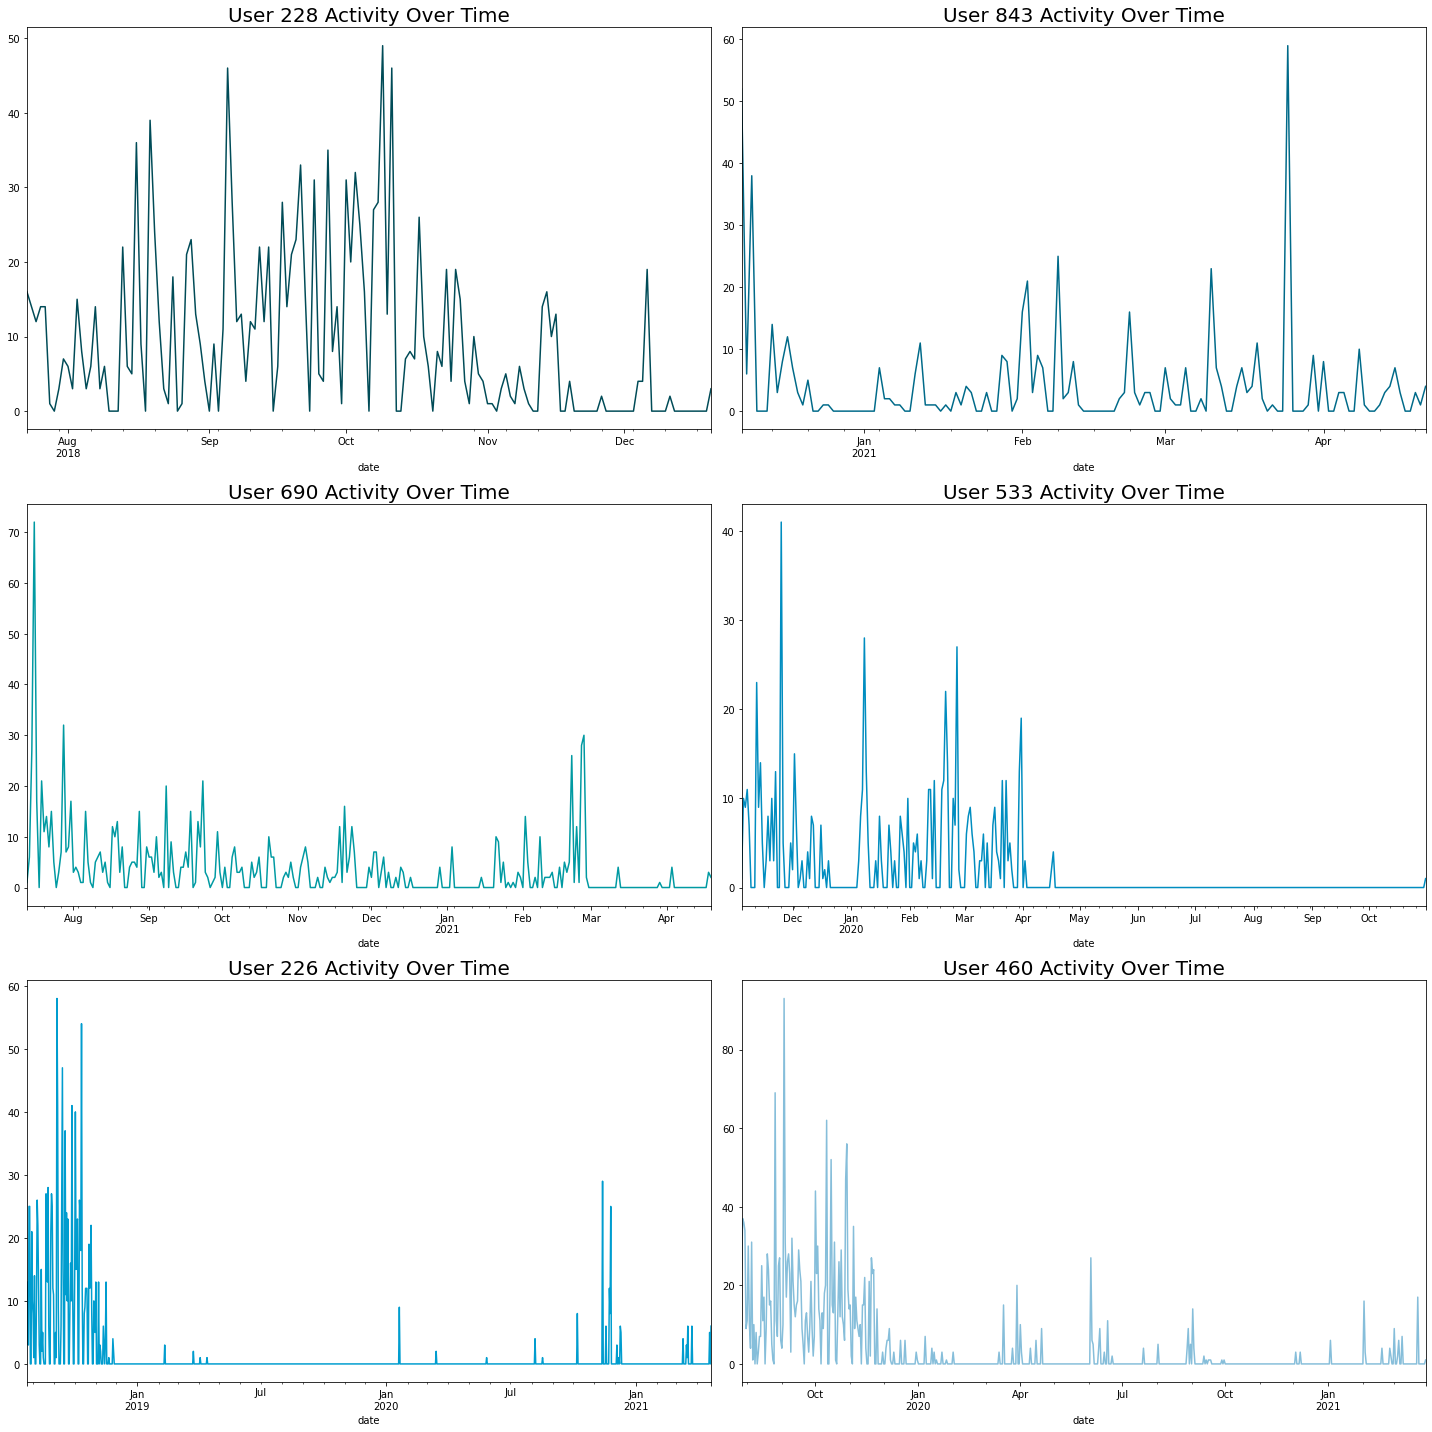

In [5]:
# Calling function to visualize the top 6 users with abnormal amount of IP addresses
explore.q3_abnormal_ip(df)

### 2️⃣  Examine user's activity over time to find suspicious activity

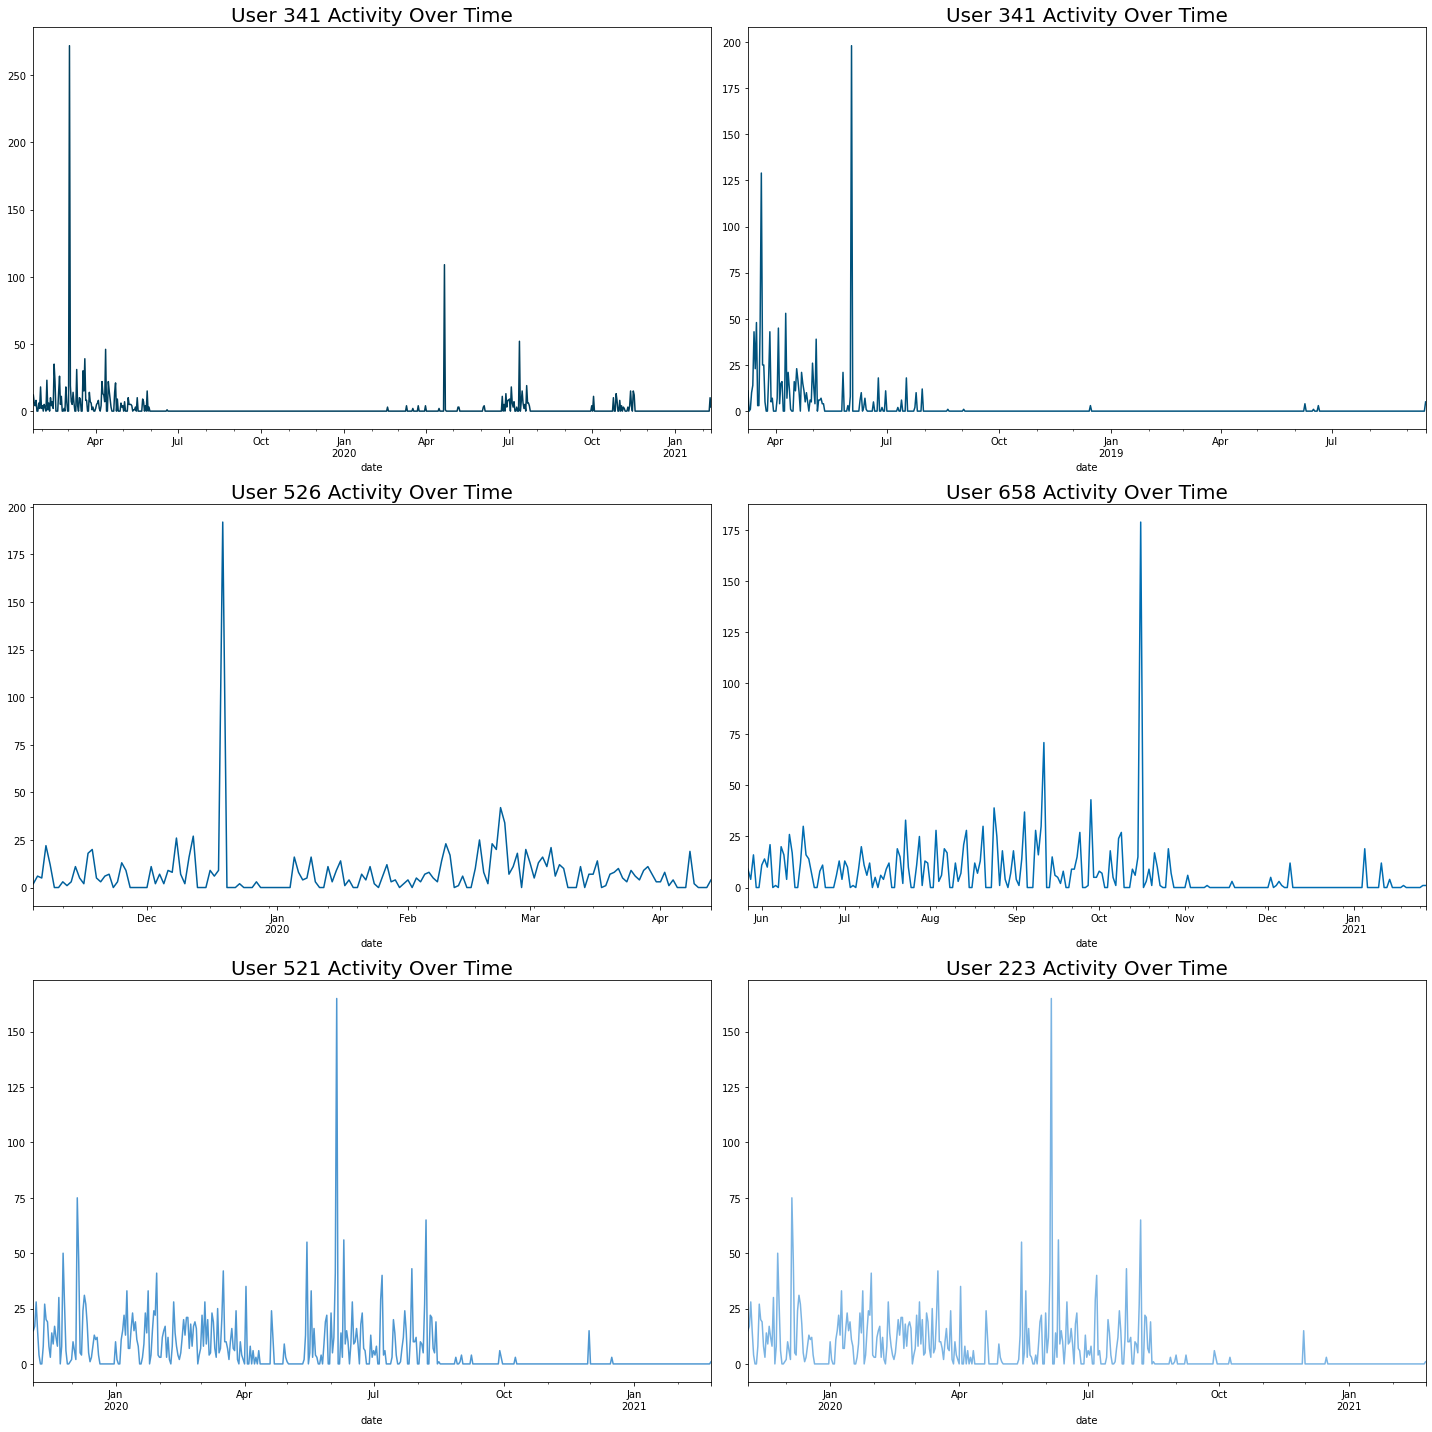

In [6]:
# Calling function to visualize the top 6 users with most page visits and abnormal activity pattern
explore.q3_abnormal_users(df)

## Takeaways:

▪️ There are 29 users have suspicious activities, among those users we suspect 2 of them perform web-scrapping and 3 appear to be accessing curriculums that they shouldn't access.

▪️ There is no suspicious IP address. But for those who have significant amount of IP addresses during their program, their IP address appear to be distributed accross the United States.

▪️ 116 users have abnormal amount of log entry (page visit)



***

## Question 5: At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

#### Approach:
▪️ Seperated the Data Science and Web Dev students, then listed the most popular paths viewed for each.

▪️ Looked at entries where DS students look at WD material and vice versa.

In [4]:
# Calling user-defined function to store data science and web dep student in 2 dataframes
ds, wd = explore.q5(df)
# most popular web dev paths viewed
wd.path.value_counts().head(20)

/                                                                            37495
javascript-i                                                                 18193
toc                                                                          17580
search/search_index.json                                                     15331
java-iii                                                                     13162
html-css                                                                     13111
java-ii                                                                      12173
spring                                                                       11877
jquery                                                                       11037
mysql                                                                        10602
java-i                                                                       10460
javascript-ii                                                                10290
appe

## Takeaways for Question 5:

▪️ **For Data Science Program**: There does not appear to be any access to the Web Dev paths before September 2019, and after December 2019. Which leads me to believe they did not have access during those time periods.

▪️ **For Web Development Program**: There appears to be access to the Data Science paths after September 2019. Specifically, from July 2020 to April 2021.

***

## Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

***

## Question 7: Which lessons are least accessed?

## Takeaways:
▪️ **For Web Development Program:** there are 400+ pages that were accessed only once.

▪️ **For Data Science Program:** there are 100+ pages that were accessed only once.

▪️ Some commonalities are that many of the pages are introduction pages with no useful information.